In [3]:
from fastbook import *
from fastai.vision.widgets import *

/home/buscemi/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [22]:
import fastbook
fastbook.setup_book()

Export the trained file from a pickle file.

In [4]:
learner_inf = load_learner('export.pkl')

Use random image to test.

In [8]:
learner_inf.predict('blackB.jpeg')

('black', tensor(0), tensor([9.9990e-01, 8.7393e-05, 9.5760e-06]))

Create upload button

In [23]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:
btn_upload = SimpleNamespace(data = ['blackB.jpeg'])

In [25]:
img = PILImage.create(btn_upload.data[-1])

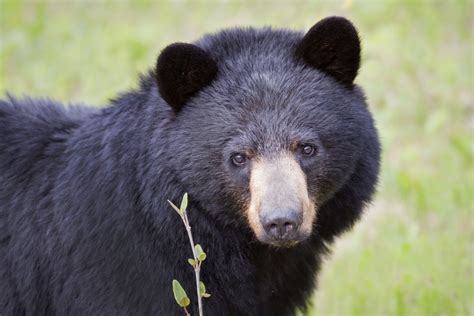

In [26]:
img

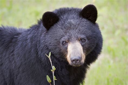

Output()

In [27]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Get predictions

In [28]:
pred,pred_idx,probs = learner_inf.predict(img)

Use ```Label``` to display

In [29]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: black; Probability: 0.9999')

A button to classify

In [30]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Create button event handler

In [31]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Put button in vertical box

In [32]:
btn_upload = widgets.FileUpload()

In [33]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [35]:
# !pip install voila
# !jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /home/buscemi/.jupyter
    - Validating...
      voila 0.2.4 OK
Enabling: —sys-prefix
- Writing config: /home/buscemi/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?
